## 6: Clustering with K-Means  

The goal of unsupervised learning is to discover hidden structure or patterns in unlabeled training
data. Clustering, or cluster analysis, is the task of grouping observations such that
members of the same group, or cluster, are more similar to each other by a given
metric than they are to the members of the other clusters.  

**Clustering with the K-Means algorithm**  

K-Means is an iterative process of moving the centers of the clusters, or the
centroids, to the mean position of their constituent points, and re-assigning instances
to their closest clusters. The titular K is a hyperparameter that specifies the number of
clusters that should be created; K-Means automatically assigns observations to clusters
but cannot determine the appropriate number of clusters. K must be a positive integer
that is less than the number of instances in the training set.  

The parameters of K-Means are the positions of the clusters' centroids and the
observations that are assigned to each cluster. Like generalized linear models and
decision trees, the optimal values of K-Means' parameters are found by minimizing
a cost function. The cost function for K-Means is given by the following equation:  

$$ J = \sum_{k=1}^{K} \sum_{i \epsilon C_k} || x_i - \mu_k || ^2 $$ 

In the preceding equation, k μ is the centroid for the cluster k . The cost function sums
the distortions of the clusters. Each cluster's distortion is equal to the sum of the
squared distances between its centroid and its constituent instances. The distortion is
small for compact clusters and large for clusters that contain scattered instances.  

The parameters that minimize the cost function are learned through an iterative process
of assigning observations to clusters and then moving the clusters.  

In practice, setting the centroids' positions equal to the positions of randomly selected observations yields the best
results. During each iteration, K-Means assigns observations to the cluster that they
are closest to, and then moves the centroids to their assigned observations' mean
location.  

### The elbow method  

If K is not specified by the problem's context, the optimal number of clusters can
be estimated using a technique called the elbow method. The elbow method plots
the value of the cost function produced by different values of K. As K increases,
the average distortion will decrease; each cluster will have fewer constituent
instances, and the instances will be closer to their respective centroids.  
..................However, the improvements to the average distortion will decline as K increases. The value
of K at which the improvement to the distortion declines the most is called the
elbow.

In [32]:
# import
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.utils import shuffle
import mahotas as mh

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

%matplotlib inline

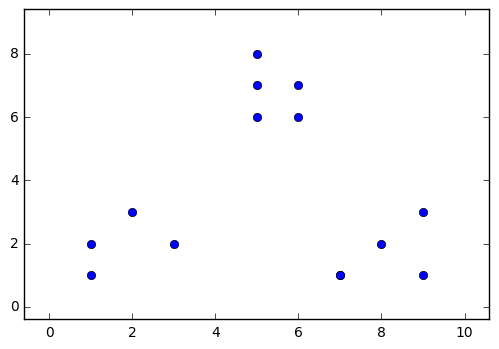

In [2]:
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(3.5, 4.5, (2, 10))

x = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
y = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])


plt.plot(x,y, 'ob')
plt.margins(0.2)

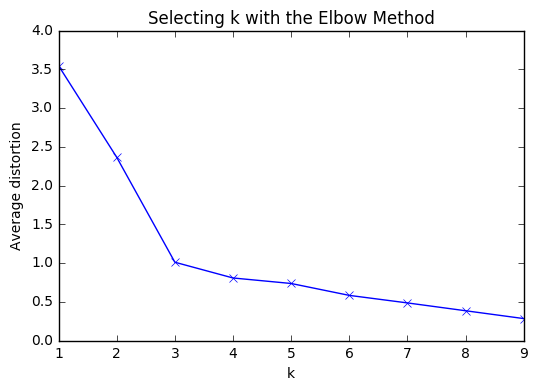

In [3]:
X = np.hstack((cluster1, cluster2)).T
X = np.vstack((x, y)).T

K = range(1, 10)
meandistortions = []
for k in K:
	kmeans = KMeans(n_clusters=k)
	kmeans.fit(X)
	meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

** Evaluating clusters **   

The **silhouette coefficient** is a measure of
the compactness and separation of the clusters. It increases as the quality of the clusters
increase; it is large for compact clusters that are far from each other and small for large,
overlapping clusters. The silhouette coefficient is calculated per instance; for a set of
instances, it is calculated as the mean of the individual samples' scores. The silhouette
coefficient for an instance is calculated with the following equation:  

$$ s = \frac{ba}{max(a,b)} $$  

a is the mean distance between the instances in the cluster. b is the mean distance
between the instance and the instances in the next closest cluster.

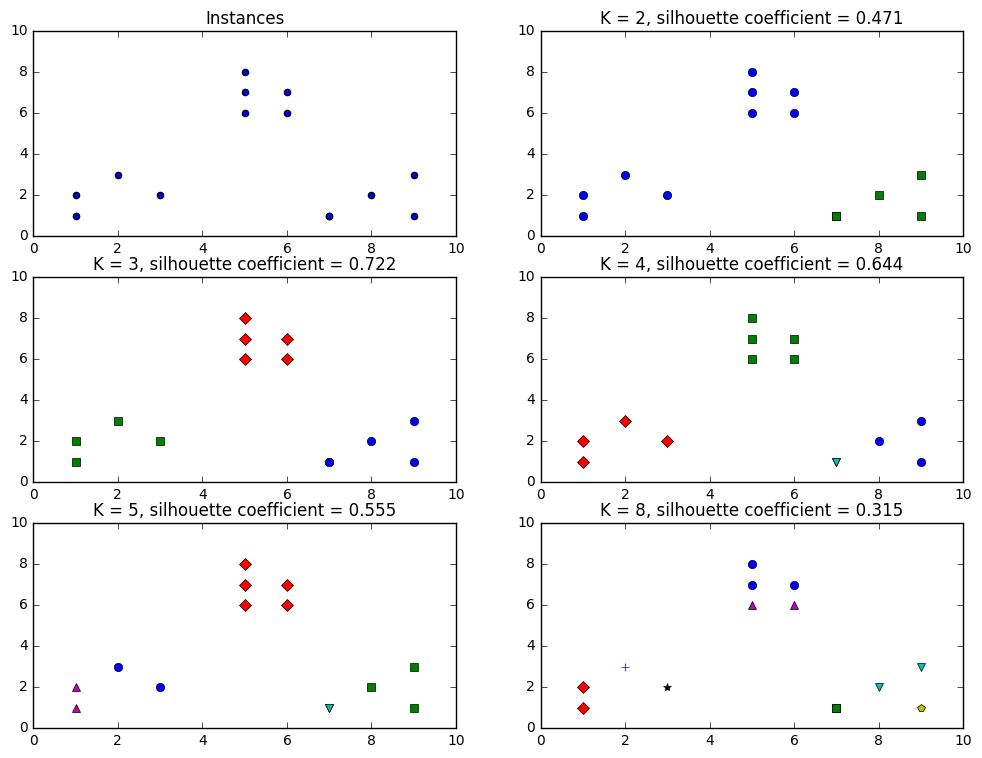

In [30]:
plt.figure(figsize=(12,9))
plt.subplot(3, 2, 1)


x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
#print(list(zip(x1, x2)))


plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 8]
subplot_counter = 1

for t in tests:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.title('K = %s, silhouette coefficient = %.03f' % (
        t, metrics.silhouette_score(X, kmeans_model.labels_, metric='euclidean')))
plt.show()

#### Image Quantization

In [34]:
original_img = np.array(mh.imread('data/atul.jpg'), dtype=np.float64) / 255
original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)
image_flattened = np.reshape(original_img, (width * height, depth))

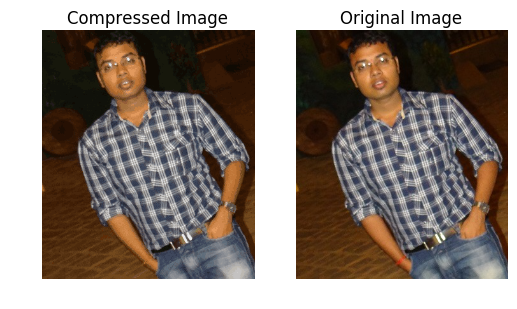

In [35]:
image_array_sample = shuffle(image_flattened, random_state=0)[:1000]
estimator = KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)
cluster_assignments = estimator.predict(image_flattened)


compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.shape[1]))
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1
plt.subplot(122)
plt.title('Original Image')
plt.imshow(original_img)
plt.axis('off')
plt.subplot(121)
plt.title('Compressed Image')
plt.imshow(compressed_img)
plt.axis('off')
plt.show()

#### Clustering to learn features 